##                      **Savenko - 3rd Capstone Workbook**



I’m going to use this dataset in my 3rd last final project:

https://www.kaggle.com/uciml/student-alcohol-consumption 


The data were obtained in a survey of students’ math and Portuguese language courses in secondary school. It contains a lot of interesting social, gender, and study information about students. You can use it for some EDA or try to predict students’ final grades.

 I’m interested in researching different variables for finding reasons to say which ones are connected or transfer to grades:
*   Does family size or family relationships affect grades?
*   Do absences affect grades?
*   Does alcohol consumption affect grades?
*   Does weekly study affect grades?
*   Do special paid courses affect grades?
*   Do health status connects with final grades?
*   Other questions


I will do different analysis to investigate dataset and find important insights about interconnection between variables. Next task is to verificate these
dependencies via T-test and P-value comparison to Alpha.








### Accessing Data


In [ ]:
# Importing from google drive
from google.colab import drive
drive.mount('/content/gdrive')

# Path way to file '/content/gdrive/My Drive/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Importing pandas,scipy,seaborn,matplotlib and connecting with two datasets
import pandas as pd
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set()
m_stu = pd.read_csv('/content/gdrive/My Drive/Thinkful/3rd Capstone/student-mat.csv')
p_stu = pd.read_csv('/content/gdrive/My Drive/Thinkful/3rd Capstone/student-por.csv')

### Basic Data Info

In [ ]:
#Get info about Portuguese dataset
p_stu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
#Get info about Math dataset
m_stu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
# Portuguese shape
p_stu.shape

(649, 33)

In [ ]:
# Math shape
m_stu.shape

(395, 33)

#### I decided to work with Portuguese dataset because it contains more data to analyze and this reason is better for hypotheses testing.

### Data Investigation

In [ ]:
#Grades info
# After this describe method, I also decided to work only with G3(final) grades for easier understanding and better interpretation
descr= p_stu[['G1','G2','G3']].describe()
descr.round()

,G1,G2,G3
count,649.0,649.0,649.0
mean,11.0,12.0,12.0
std,3.0,3.0,3.0
min,0.0,0.0,0.0
25%,10.0,10.0,10.0
50%,11.0,11.0,12.0
75%,13.0,13.0,14.0
max,19.0,19.0,19.0


<Figure size 720x720 with 0 Axes>

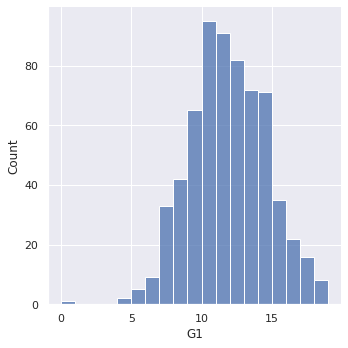

In [ ]:
# G1 grades distrubution
plt.figure(figsize=(10,10))
G1_dist=sns.displot(p_stu['G1'])

<Figure size 720x720 with 0 Axes>

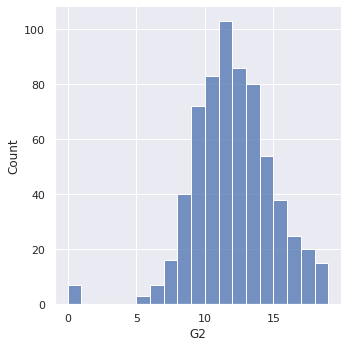

In [ ]:
# G2 grades distrubution
plt.figure(figsize=(10,10))
G2_dist=sns.displot(p_stu['G2'],bins=19)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


12.0
11.906009244992296


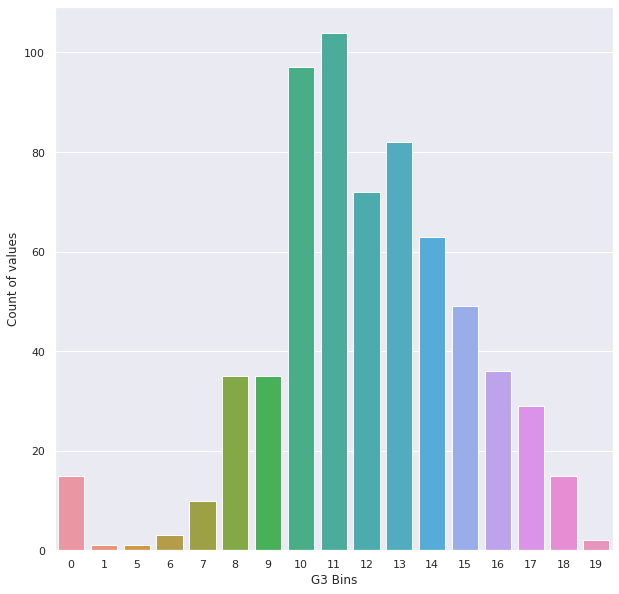

In [ ]:
# G3 grades distrubution
plt.figure(figsize=(10,10))
#sns.displot(p_stu['G3'])
G3count= sns.countplot(p_stu['G3'] )
G3count.set(xlabel='G3 Bins', ylabel='Count of values')
print(p_stu['G3'].median())
print(p_stu['G3'].mean())

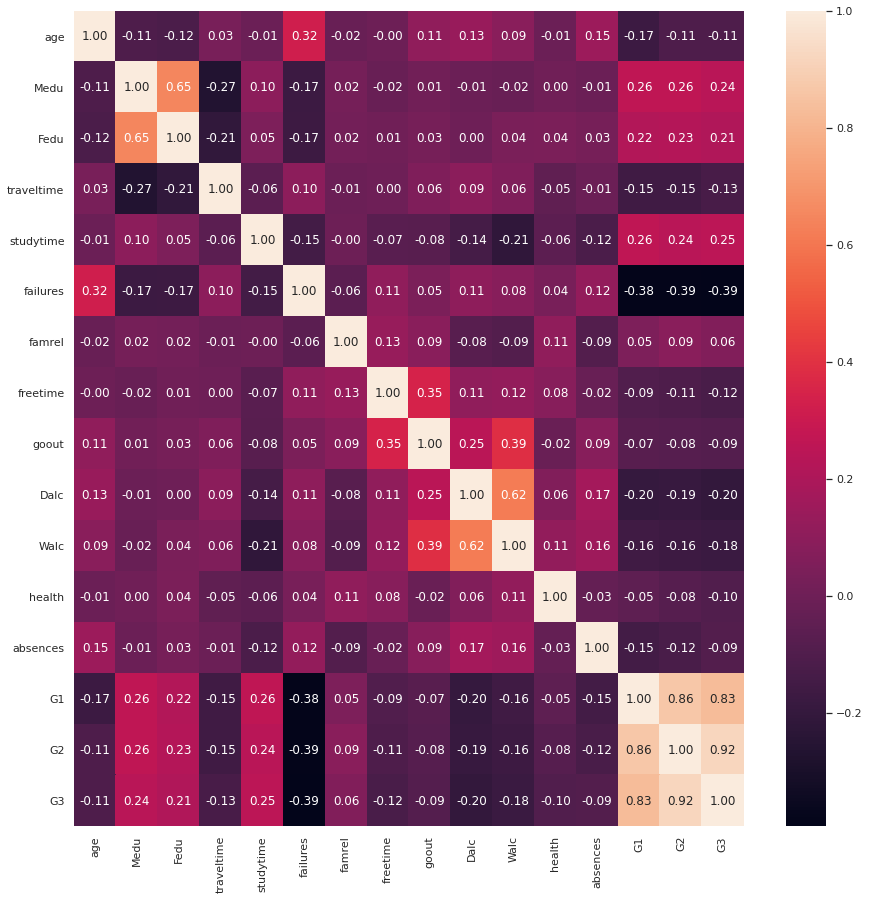

In [ ]:
# Trying to find correlations
plt.figure(figsize=(15,15))
sns.heatmap(p_stu.corr(),annot=True,cbar=True,fmt = ".2f")

#### After these methods, I also decided to work only with G3(final) grades for easier understanding and better interpretation.


In [ ]:
# School type counts
p_stu['school'].value_counts()

GP    423
MS    226
Name: school, dtype: int64

In [ ]:
# Activities counting
p_stu['activities'].value_counts()

no     334
yes    315
Name: activities, dtype: int64

In [ ]:
#Family relationships counting
p_stu['famrel'].value_counts(sort=False)
#range 0-3
#range 4-5

1     22
2     29
3    101
4    317
5    180
Name: famrel, dtype: int64

In [ ]:
# Absences counting
p_stu['absences'].value_counts(sort=False)


0     244
1      12
2     110
3       7
4      93
5      12
6      49
7       3
8      42
9       7
10     21
11      5
12     12
13      1
14      8
15      2
16     10
18      3
21      2
22      2
24      1
26      1
30      1
32      1
Name: absences, dtype: int64

In [ ]:
# Address counting (Rural and Urban)
p_stu['address'].value_counts()


U    452
R    197
Name: address, dtype: int64

In [ ]:
#Sex counting
p_stu['sex'].value_counts()

F    383
M    266
Name: sex, dtype: int64

In [ ]:
# Internet counting
p_stu['internet'].value_counts()

yes    498
no     151
Name: internet, dtype: int64

In [ ]:
# Parents cohabitation status
p_stu['Pstatus'].value_counts()


T    569
A     80
Name: Pstatus, dtype: int64

In [ ]:
#Goout counting
p_stu['goout'].value_counts(sort=False)

1     48
2    145
3    205
4    141
5    110
Name: goout, dtype: int64

In [ ]:
#Freetime counting
p_stu['freetime'].value_counts(sort=False)

1     45
2    107
3    251
4    178
5     68
Name: freetime, dtype: int64

In [ ]:
# Travel time and study time counting
p_stu['traveltime'].value_counts()
p_stu['studytime'].value_counts()

2    305
1    212
3     97
4     35
Name: studytime, dtype: int64

In [ ]:
# Family size counting
p_stu['famsize'].value_counts()


GT3    457
LE3    192
Name: famsize, dtype: int64

In [ ]:
# School support and family support counting
p_stu['schoolsup'].value_counts()
p_stu['famsup'].value_counts()

yes    398
no     251
Name: famsup, dtype: int64

In [ ]:
# Paid courses counting
paid_counts=p_stu['paid'].value_counts()
paid_counts

no     610
yes     39
Name: paid, dtype: int64

In [ ]:
# Failures counting
p_stu['failures'].value_counts()

0    549
1     70
2     16
3     14
Name: failures, dtype: int64

In [ ]:
# Daily alcohol consumption counting
p_stu['Dalc'].value_counts()


1    451
2    121
3     43
5     17
4     17
Name: Dalc, dtype: int64

In [ ]:
#health counting
p_stu['health'].value_counts(sort=False)

1     90
2     78
3    124
4    108
5    249
Name: health, dtype: int64

In [ ]:
# Nursery school attending
nursery=p_stu['nursery'].value_counts()

count    649.000000
mean      16.744222
std        1.218138
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

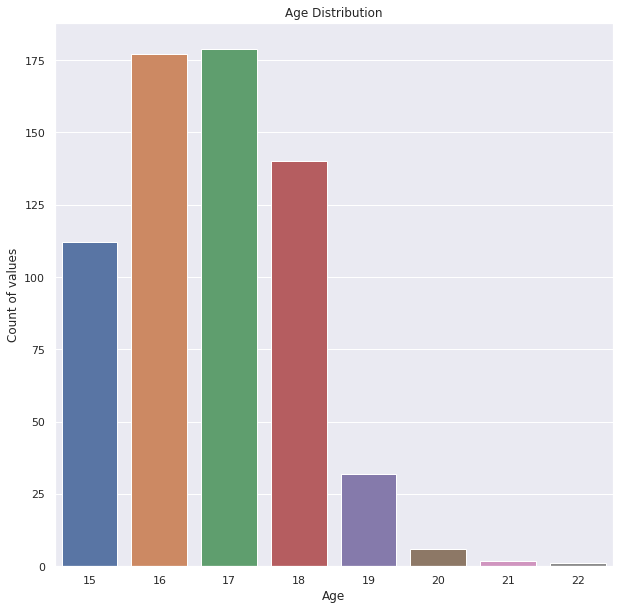

In [ ]:
# Age counting in a chart
plt.figure(figsize=(10,10))
Agechart = sns.countplot(data=p_stu,x='age').set_title('Age Distribution')
#Agechart.set(xlabel='Age', ylabel = 'Count of values')
plt.xlabel('Age')
plt.ylabel('Count of values')
#p_stu['age'].value_counts(sort=False)
#p_stu['age'].describe()

1    247
2    150
3    120
4     87
5     45
Name: Walc, dtype: int64

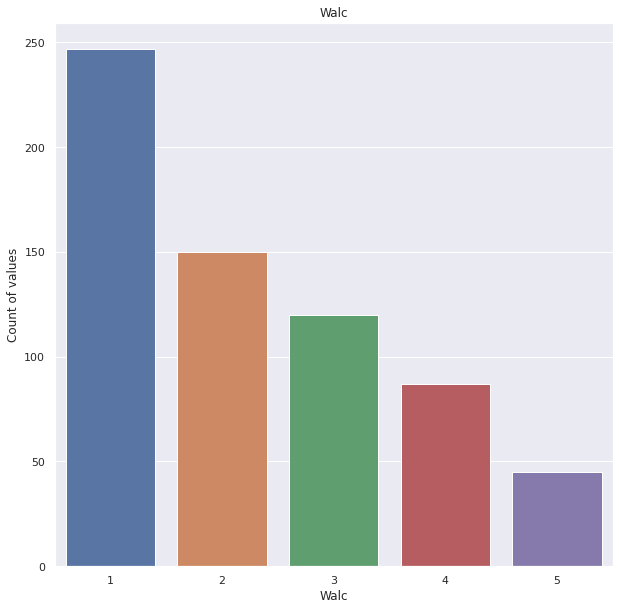

In [ ]:
# Weekly alcohol consumption chart
plt.figure(figsize=(10,10))
sns.countplot(data=p_stu,x='Walc').set_title('Walc')
plt.xlabel('Walc')
plt.ylabel('Count of values')
p_stu['Walc'].value_counts()

F    383
M    266
Name: sex, dtype: int64

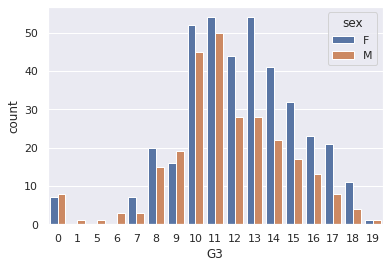

<Figure size 720x720 with 0 Axes>

In [ ]:
# Countplot of grades by sex
# These values can be misleading due to having more women than men.
sns.countplot(x='G3',data=p_stu, hue='sex')
plt.figure(figsize=(10,10))
p_stu['sex'].value_counts()

F    383
M    266
Name: sex, dtype: int64

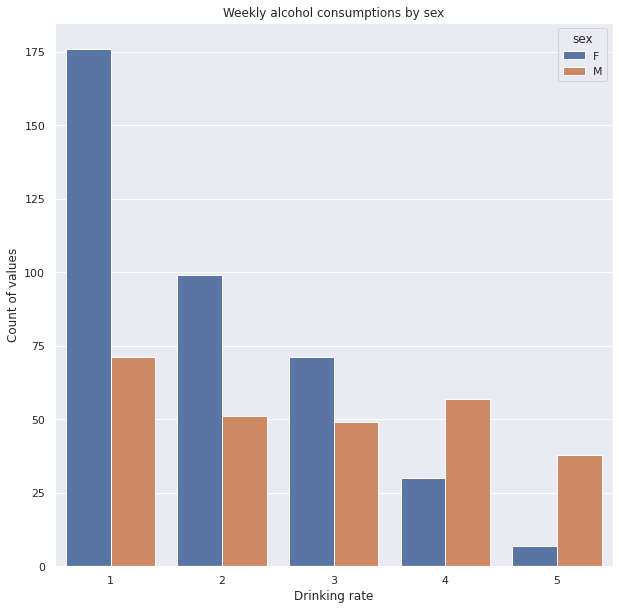

In [ ]:
#Weekly Alcohol consumption by sex
plt.figure(figsize=(10,10))
sns.countplot(data=p_stu,x='Walc',hue='sex').set_title('Weekly alcohol consumptions by sex')
plt.xlabel('Drinking rate')
plt.ylabel('Count of values')
p_stu['sex'].value_counts()

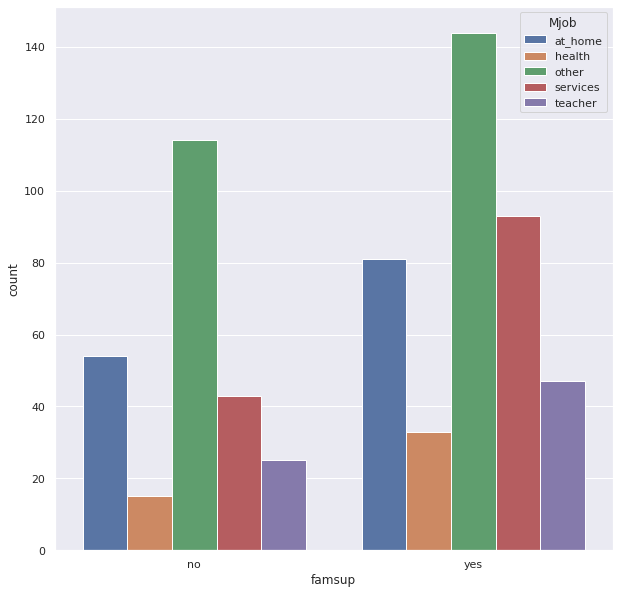

In [ ]:
# Family support by monthers job
plt.figure(figsize=(10,10))
sns.countplot(data=p_stu, x='famsup', hue='Mjob')

15    112
16    177
17    179
18    140
19     32
20      6
21      2
22      1
Name: age, dtype: int64

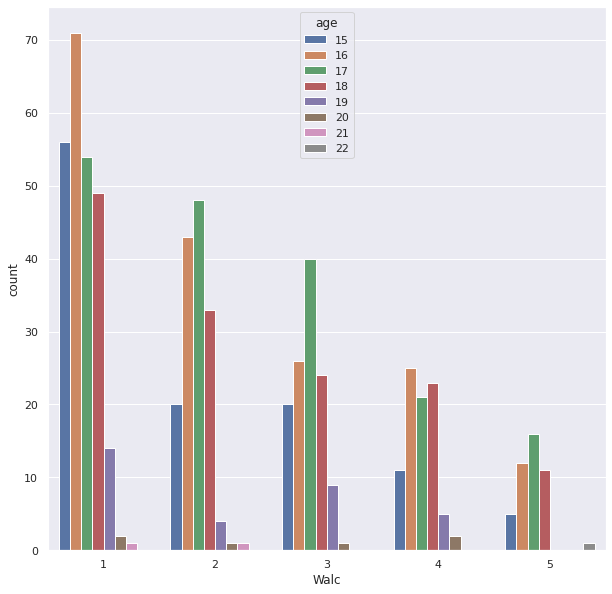

In [ ]:
# Weekly alcohol consumption by age
plt.figure(figsize=(10,10))
sns.countplot(data=p_stu,x='Walc',hue='age')
p_stu['age'].value_counts(sort=False)

1    247
2    150
3    120
4     87
5     45
Name: Walc, dtype: int64

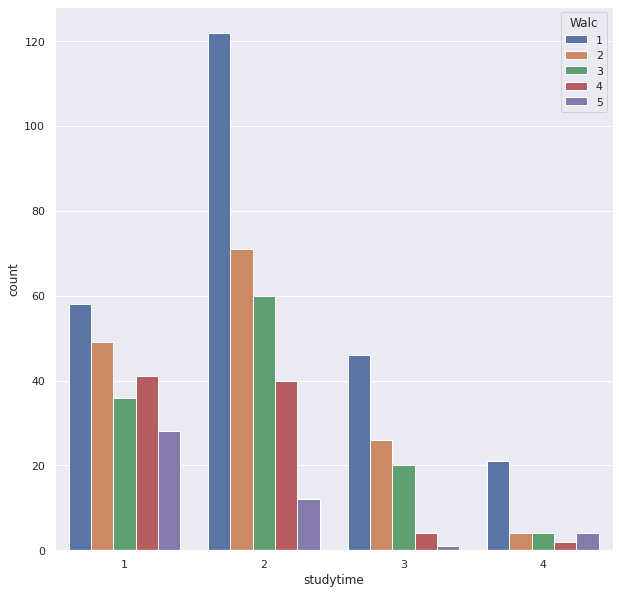

In [ ]:
# Studytime by Weekly alcohol consumpion. Do people drink much and study much?
plt.figure(figsize=(10,10))
sns.countplot(data=p_stu,x='studytime',hue='Walc')
p_stu['Walc'].value_counts(sort=False)

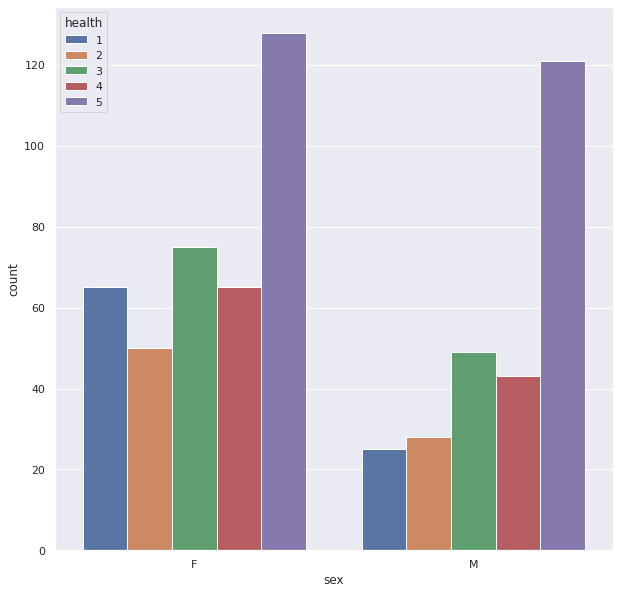

In [ ]:
# Health chart by sex
plt.figure(figsize=(10,10))
sns.countplot(data=p_stu,x='sex',hue='health')
#p_stu['Walc'].value_counts(sort=False)

Text(0, 0.5, 'G3 Grades')

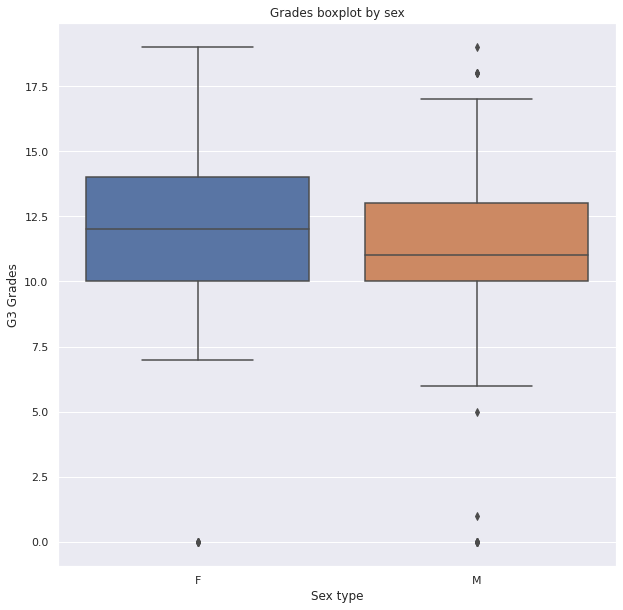

In [ ]:
# Test grades by weekly alcohol consumption
plt.figure(figsize=(10,10))
#sns.countplot(data=p_stu,x='G3',hue='Walc')
#p_stu['Walc'].value_counts(sort=False)
sns.boxplot(y='G3',x='sex', data=p_stu).set_title('Grades boxplot by sex')
plt.xlabel('Sex type')
plt.ylabel('G3 Grades')

In [ ]:
# Mother and father education 
# 0-2 = none to 9th grade
# 3-5 =  secondary education to higher educatio
p_stu['Medu'].value_counts(sort=False)
p_stu['Fedu'].value_counts(sort=False)
m_low= p_stu[p_stu['Medu']<=2]
m_high = p_stu[p_stu['Medu']>=3]
f_low = p_stu[p_stu['Fedu']<=2]
f_high=p_stu[p_stu['Fedu']>=3]

In [ ]:
# Reason to choose the school and comparing to grades
p_stu['reason'].value_counts()
c=p_stu[p_stu['reason']=='course']
h=p_stu[p_stu['reason']=='home']
r=p_stu[p_stu['reason']=='reputation']
o=p_stu[p_stu['reason']=='other']
print(c['G3'].describe())
print(h['G3'].describe())
print(r['G3'].describe())
print(o['G3'].describe())



count    285.000000
mean      11.547368
std        3.108717
min        0.000000
25%       10.000000
50%       11.000000
75%       14.000000
max       18.000000
Name: G3, dtype: float64
count    149.000000
mean      12.181208
std        2.952447
min        0.000000
25%       11.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64
count    143.000000
mean      12.944056
std        3.052997
min        0.000000
25%       11.000000
50%       13.000000
75%       15.000000
max       19.000000
Name: G3, dtype: float64
count    72.000000
mean     10.694444
std       3.931236
min       0.000000
25%       9.750000
50%      11.000000
75%      13.000000
max      18.000000
Name: G3, dtype: float64


### Hypotheses Testing

#### Finally, I tested hypotheses for making final conclusions. I need to explain what hypotheses are. For example, we take data with 2 parameters but with the same variable for comparison. The t-test can be used, for example, to determine if the means of two sets of data are significantly different from each other. Let's pick sex type in a next cell and compare their G3 grades. We take Male grades and Female grades and calculate their P-value using Python. P-value must be less than 0.05% (Alpha) to confirm that it's a statistical difference between two datasets. Then, I used describe method to see means and confirm the result of T-test. Also, if test shows statistic value greater than 1.96(negative too), there is a significant difference too. 
###Last one: There are Null and Alternative Hypotheses.
*   **Ho: μ1 - μ2 = 0**
*   **Ha: μ1 - μ2 ≠ 0**

####We need to reject the null(same means) if we want to confirm there is a significant difference (alternative hypothesis - different means) . If P-value more than 0.05%(Alpha) then we failed to reject the null.


### Confirmed Hypotheses

Ttest_indResult(statistic=-3.310937693029702, pvalue=0.000981528706137396)
count    266.000000
mean      11.406015
std        3.320690
min        0.000000
25%       10.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G3, dtype: float64
count    383.000000
mean      12.253264
std        3.124147
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64


<Figure size 720x720 with 0 Axes>

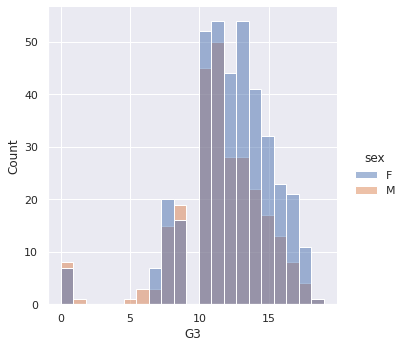

In [ ]:
# Sex type hypotheses
# Reject the null
# Women are better in tests
p_stu_m=p_stu[p_stu['sex']=='M']
p_stu_f=p_stu[p_stu['sex']=='F']
print(stats.ttest_ind(p_stu_m['G3'],p_stu_f['G3']))
print(p_stu_m['G3'].describe())
print(p_stu_f['G3'].describe())
plt.figure(figsize=(10,10))
sns.displot(data=p_stu, x= 'G3', hue='sex')

Ttest_indResult(statistic=7.54259085880782, pvalue=1.5661990923003876e-13)
count    423.000000
mean      12.576832
std        2.625636
min        0.000000
25%       11.000000
50%       13.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64
count    226.000000
mean      10.650442
std        3.833991
min        0.000000
25%        9.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G3, dtype: float64


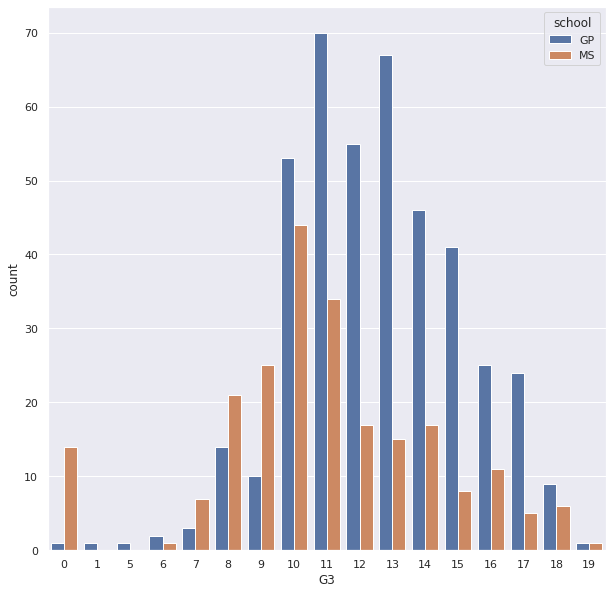

In [ ]:
# School type influence
#Reject the null
#GP school is better for test
GPsc=p_stu[p_stu['school']=='GP']
MSsc=p_stu[p_stu['school']=='MS']
print(stats.ttest_ind(GPsc['G3'],MSsc['G3']))
print(GPsc['G3'].describe())
print(MSsc['G3'].describe())
plt.figure(figsize=(10,10))
sns.countplot(data=p_stu, x= 'G3', hue='school')

1    247
2    150
3    120
4     87
5     45
Name: Walc, dtype: int64
Ttest_indResult(statistic=4.1750922480688955, pvalue=3.386655921008638e-05)
count    517.000000
mean      12.170213
std        3.216064
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64
count    132.000000
mean      10.871212
std        3.087540
min        0.000000
25%       10.000000
50%       11.000000
75%       12.250000
max       19.000000
Name: G3, dtype: float64


<Figure size 720x720 with 0 Axes>

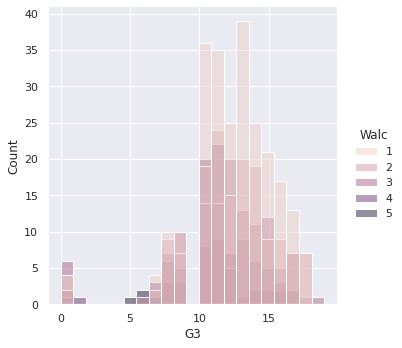

In [ ]:
# Weekly alcohol consumption hypothesis
# Reject the null
# Lower consumption
# Bigger mean
print(p_stu['Walc'].value_counts())
walcl=p_stu[p_stu['Walc']<=3]
walch=p_stu[p_stu['Walc']>=4]
print(stats.ttest_ind(walcl['G3'],walch['G3']))
print(walcl['G3'].describe())
print(walch['G3'].describe())
plt.figure(figsize=(10,10))
sns.displot(data=p_stu, x= 'G3', hue='Walc')

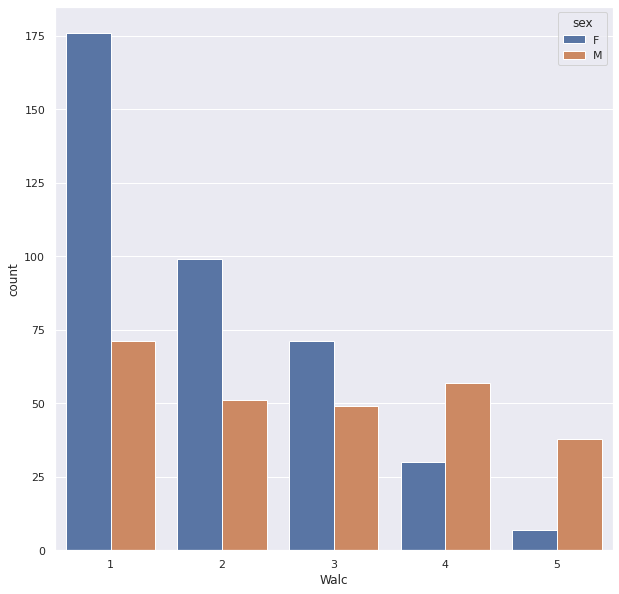

In [ ]:
#Alcohol consumption by sex
plt.figure(figsize=(10,10))
sns.countplot(data=p_stu, x= 'Walc', hue='sex')

count    517.000000
mean      11.580271
std        3.287844
min        0.000000
25%       10.000000
50%       11.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64
count    132.000000
mean      13.181818
std        2.643783
min        6.000000
25%       11.000000
50%       13.000000
75%       15.000000
max       19.000000
Name: G3, dtype: float64
Ttest_indResult(statistic=-5.183947050015792, pvalue=2.907898649986633e-07)


Text(0, 0.5, 'G3 Grades')

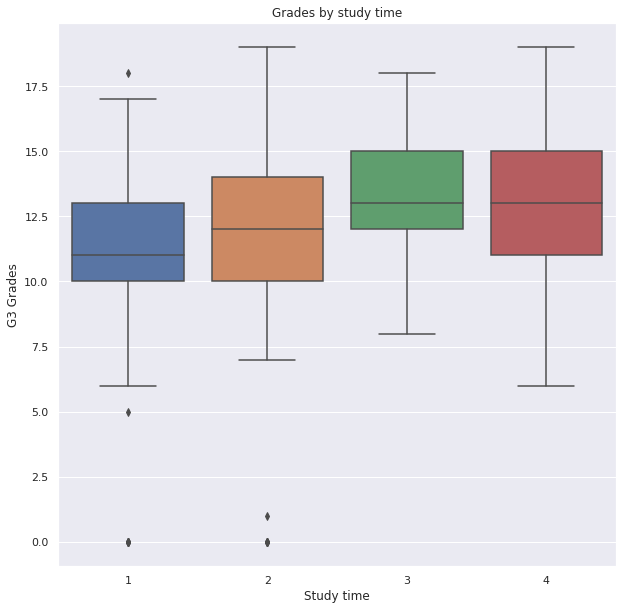

In [ ]:
# Studytime influence
# Reject the null
# More study time = bigger mean
p_stu_ls=p_stu[p_stu['studytime']<=2]
p_stu_hs=p_stu[p_stu['studytime']>=3]
print(p_stu_ls['G3'].describe())
print(p_stu_hs['G3'].describe())
print(stats.ttest_ind(p_stu_ls['G3'],p_stu_hs['G3']))
plt.figure(figsize=(10,10))
#sns.displot(data=p_stu, x= 'G3', hue='studytime')
sns.boxplot(y='G3',x='studytime', data=p_stu).set_title('Grades by study time')
plt.xlabel('Study time')
plt.ylabel('G3 Grades')

count    239.000000
mean      11.523013
std        3.560771
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       18.000000
Name: G3, dtype: float64
count    410.000000
mean      12.129268
std        3.003726
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64


Text(0, 0.5, 'G3 Grades')

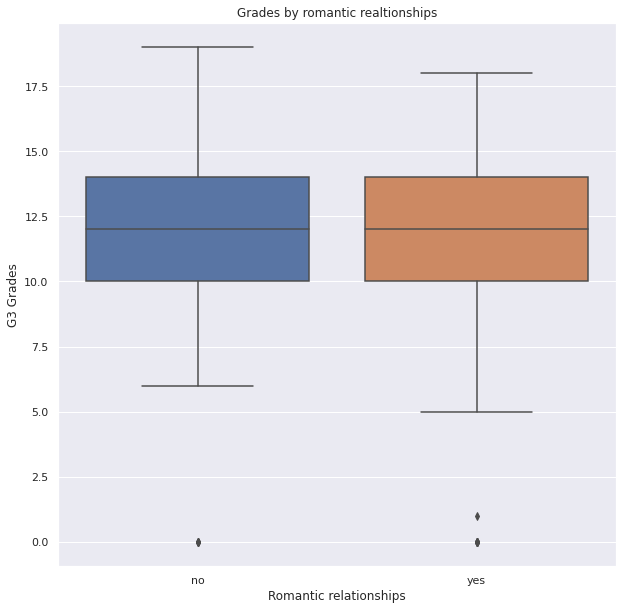

In [ ]:
# Romantic relationships influence
# No romantic = Bigger mean
# Reject the null hypotheses
romy=p_stu[p_stu['romantic']=='yes']
romn=p_stu[p_stu['romantic']=='no']
print(romy['G3'].describe())
print(romn['G3'].describe())
stats.ttest_ind(romy['G3'],romn['G3'])
plt.figure(figsize=(10,10))
#sns.countplot(data=p_stu, x= 'G3', hue='romantic')
sns.boxplot(y='G3',x='romantic', data=p_stu).set_title('Grades by romantic realtionships')
plt.xlabel('Romantic relationships')
plt.ylabel('G3 Grades')

Ttest_indResult(statistic=2.585145772418233, pvalue=0.009951443456707598)
count    152.000000
mean      11.315789
std        3.264136
min        0.000000
25%       10.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G3, dtype: float64
count    497.000000
mean      12.086519
std        3.201965
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       18.000000
Name: G3, dtype: float64


Text(0, 0.5, 'G3 Grades')

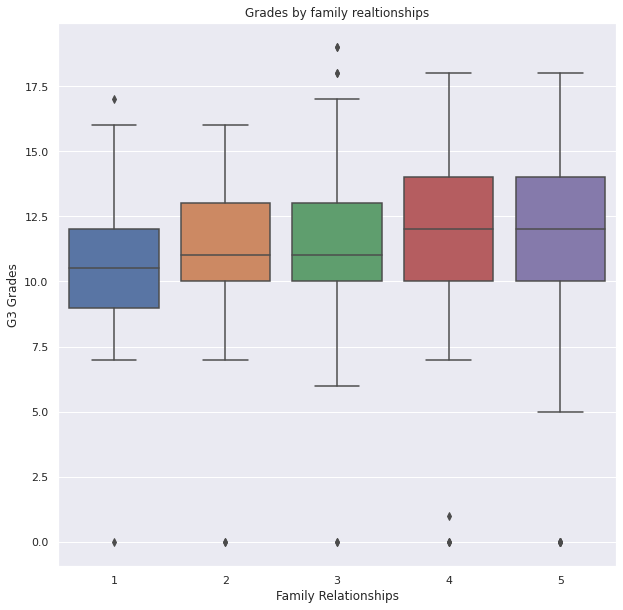

In [ ]:
# Family relationaships influence
# Reject the null
# Higher relationships= Bigger grades mean
faml=p_stu[p_stu['famrel']<=3]
famh=p_stu[p_stu['famrel']>=4]
print(stats.ttest_ind(famh['G3'],faml['G3']))
print(faml['G3'].describe())
print(famh['G3'].describe())
plt.figure(figsize=(10,10))
sns.boxplot(y='G3',x='famrel', data=p_stu).set_title('Grades by family realtionships')
plt.xlabel('Family Relationships')
plt.ylabel('G3 Grades')

Ttest_indResult(statistic=-2.9444239710408615, pvalue=0.0033516491322061488)
count    246.000000
mean      11.430894
std        3.366295
min        0.000000
25%       10.000000
50%       11.000000
75%       14.000000
max       18.000000
Name: G3, dtype: float64
count    403.000000
mean      12.196030
std        3.113729
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64


Text(0, 0.5, 'G3 Grades')

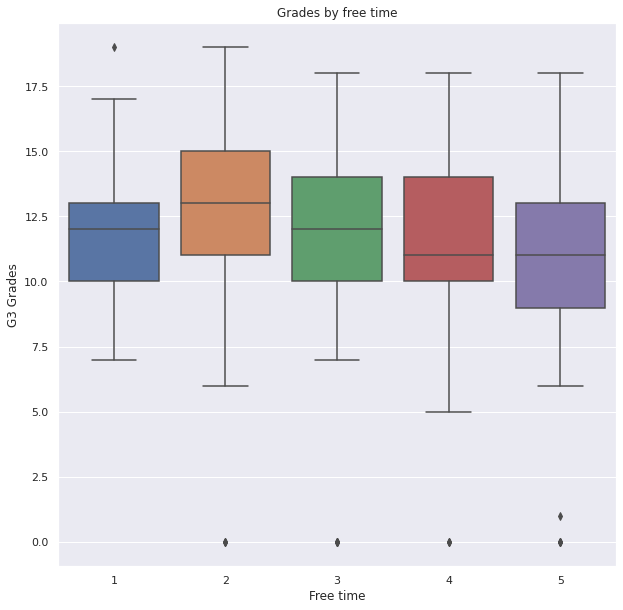

In [ ]:
# Freetime influence
# Reject the null
# Lower freetime = bigger mean
freeh=p_stu[p_stu['freetime']>=4]
freel=p_stu[p_stu['freetime']<=3]
print(stats.ttest_ind(freeh['G3'],freel['G3']))
print(freeh['G3'].describe())
print(freel['G3'].describe())
plt.figure(figsize=(10,10))
sns.boxplot(y='G3',x='freetime', data=p_stu).set_title('Grades by free time')
plt.xlabel('Free time')
plt.ylabel('G3 Grades')

In [ ]:
# Goout influence
# Reject the null
# Less go out = bigger mean
goouth=p_stu[p_stu['goout']>=4]
gooutl=p_stu[p_stu['goout']<=3]
print(stats.ttest_ind(goouth['G3'],gooutl['G3']))
print(freeh['G3'].describe())
print(freel['G3'].describe())

Ttest_indResult(statistic=-2.616608556668642, pvalue=0.009088201931350293)
count    246.000000
mean      11.430894
std        3.366295
min        0.000000
25%       10.000000
50%       11.000000
75%       14.000000
max       18.000000
Name: G3, dtype: float64
count    403.000000
mean      12.196030
std        3.113729
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64


count    151.000000
mean      11.026490
std        3.446635
min        0.000000
25%       10.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G3, dtype: float64
count    498.000000
mean      12.172691
std        3.117146
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64
Ttest_indResult(statistic=3.8597451144078265, pvalue=0.0001248917344745216)


Text(0, 0.5, 'G3 grades')

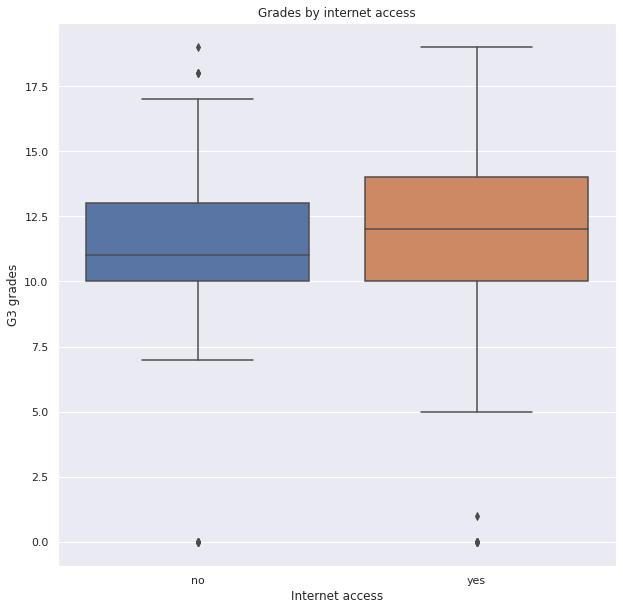

In [ ]:
# Internet access influence
# Reject the null
# Access to internet = bigger mean
inty=p_stu[p_stu['internet']=='yes']
intn=p_stu[p_stu['internet']=='no']
print(intn['G3'].describe())
print(inty['G3'].describe())
print(stats.ttest_ind(inty['G3'],intn['G3']))
plt.figure(figsize=(10,10))
#sns.countplot(data=p_stu, x= 'G3', hue='internet')
sns.boxplot(y='G3',x='internet', data=p_stu).set_title('Grades by internet access')
plt.xlabel('Internet access')
plt.ylabel('G3 grades')

Ttest_indResult(statistic=-4.325264214751824, pvalue=1.764153460922413e-05)
count    452.000000
mean      12.263274
std        2.987658
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64
count    197.000000
mean      11.086294
std        3.605221
min        0.000000
25%       10.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G3, dtype: float64


Text(0, 0.5, 'G3 Grades')

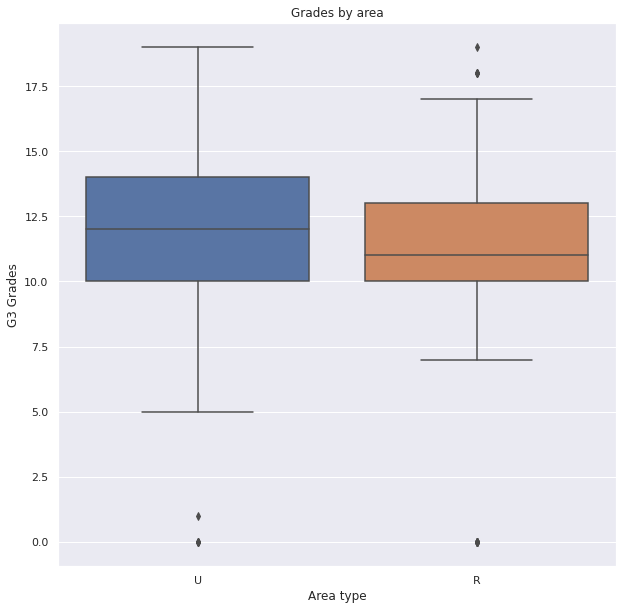

In [ ]:
# Address hypotheses
# Reject the null
# the urban is better
p_stu_r=p_stu[p_stu['address']=='R']
p_stu_u=p_stu[p_stu['address']=='U']
print(stats.ttest_ind(p_stu_r['G3'],p_stu_u['G3']))
print(p_stu_u['G3'].describe())
print(p_stu_r['G3'].describe())
plt.figure(figsize=(10,10))
#sns.countplot(data=p_stu, x= 'G3', hue='address')
sns.boxplot(y='G3',x='address', data=p_stu).set_title('Grades by area')
plt.xlabel('Area type')
plt.ylabel('G3 Grades')

Ttest_indResult(statistic=-5.091907650205812, pvalue=4.6545421061323735e-07)
count    335.000000
mean      11.292537
std        3.110409
min        0.000000
25%       10.000000
50%       11.000000
75%       13.000000
max       18.000000
Name: G3, dtype: float64
count    314.000000
mean      12.560510
std        3.232893
min        0.000000
25%       11.000000
50%       13.000000
75%       15.000000
max       19.000000
Name: G3, dtype: float64


Text(0, 0.5, 'G3 Grades')

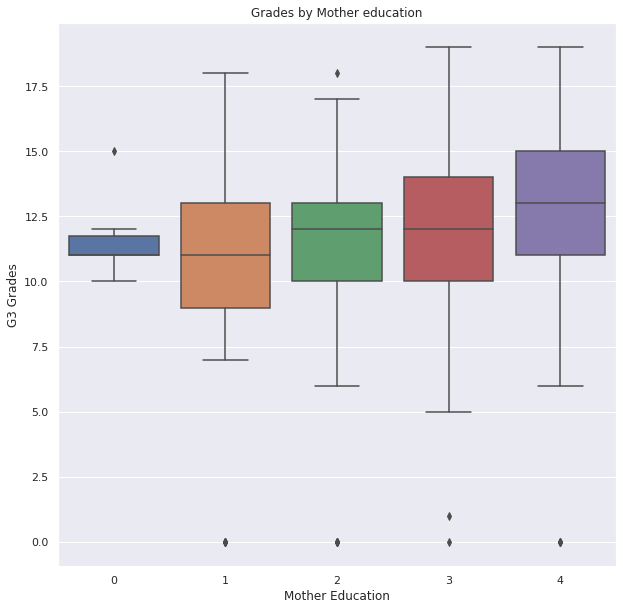

In [ ]:

# Mother and father education influence
# Reject the null hypotheses
# Higher parents education = Bigger mean
#print(p_stu['Medu'].value_counts(sort=False))
#print(p_stu['Fedu'].value_counts(sort=False))
m_low= p_stu[p_stu['Medu']<=2]
m_high = p_stu[p_stu['Medu']>=3]
f_low = p_stu[p_stu['Fedu']<=2]
f_high=p_stu[p_stu['Fedu']>=3]

print(stats.ttest_ind(m_low['G3'],m_high['G3']))
#print(stats.ttest_ind(f_high['G3'], f_low['G3']))
print(m_low['G3'].describe())
print(m_high['G3'].describe())
#print(f_low['G3'].describe())
#print(f_high['G3'].describe())
plt.figure(figsize=(10,10))
sns.boxplot(y='G3',x='Medu', data=p_stu).set_title('Grades by Mother education')
#sns.boxplot(y='G3',x='Fedu', data=p_stu).set_title('Grades by Father education')
plt.xlabel('Mother Education')
plt.ylabel('G3 Grades')

  ### Failed Hypotheses

Ttest_indResult(statistic=-1.3985028514948723, pvalue=0.16244124863569995)
count    39.000000
mean     11.205128
std       2.848633
min       0.000000
25%      10.000000
50%      12.000000
75%      13.000000
max      16.000000
Name: G3, dtype: float64
count    610.000000
mean      11.950820
std        3.250496
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64


Text(0, 0.5, 'G3 Grades')

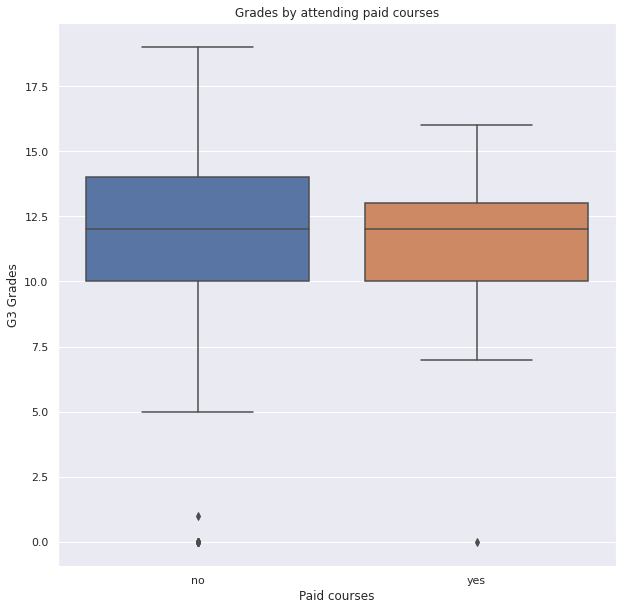

In [ ]:
# Paid courses influence
# Fail to reject the null
p_stu_paid=p_stu[p_stu['paid']=='yes']
p_stu_no_paid=p_stu[p_stu['paid']=='no']
print(stats.ttest_ind(p_stu_paid['G3'],p_stu_no_paid['G3']))
print(p_stu_paid['G3'].describe())
print(p_stu_no_paid['G3'].describe())
plt.figure(figsize=(10,10))
sns.boxplot(data= p_stu,y='G3', x='paid').set_title('Grades by attending paid courses')
plt.xlabel('Paid courses')
plt.ylabel('G3 Grades')

In [ ]:
# Nursery school influence
# Fail to reject the null
nury=p_stu[p_stu['nursery']=='yes']
nurn=p_stu[p_stu['nursery']=='no']
print(stats.ttest_ind(nury['G3'],nurn['G3']))
print(nury['G3'].describe())
print(nurn['G3'].describe())

Ttest_indResult(statistic=0.7316530999307261, pvalue=0.46464524309822697)
count    521.000000
mean      11.952015
std        3.284521
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64
count    128.000000
mean      11.718750
std        3.006391
min        0.000000
25%       10.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G3, dtype: float64


In [ ]:
#Activities influence
# Fail to reject the null
acty=p_stu[p_stu['activities']=='yes']
actn=p_stu[p_stu['activities']=='no']
print(acty['G3'].describe())
print(actn['G3'].describe())
stats.ttest_ind(acty['G3'],actn['G3'])

count    315.000000
mean      12.104762
std        3.218944
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64
count    334.000000
mean      11.718563
std        3.235290
min        0.000000
25%       10.000000
50%       11.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64


Ttest_indResult(statistic=1.5235928475225686, pvalue=0.128099059505428)

Ttest_indResult(statistic=1.508610422766134, pvalue=0.1318865120420247)
count    251.000000
mean      11.665339
std        3.602160
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64
count    398.000000
mean      12.057789
std        2.967358
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64


Text(0, 0.5, 'G3 Grades')

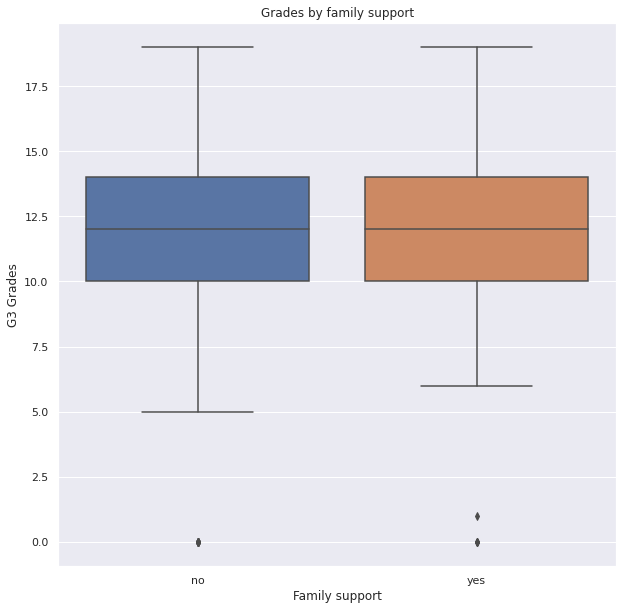

In [ ]:
# Famiy support influence
# Fail to reject the null
famy=p_stu[p_stu['famsup']=='yes']
famn=p_stu[p_stu['famsup']=='no']
print(stats.ttest_ind(famy['G3'],famn['G3']))
print(famn['G3'].describe())
print(famy['G3'].describe())
plt.figure(figsize=(10,10))
sns.boxplot(data= p_stu,y='G3', x='famsup').set_title('Grades by family support')
plt.xlabel('Family support')
plt.ylabel('G3 Grades')

In [ ]:
# Parent status hypotheses
# Fail to reject the null
p_stu['Pstatus'].value_counts()
psA=p_stu[p_stu['Pstatus']=='A']
psT=p_stu[p_stu['Pstatus']=='T']
print(psA['G3'].describe())
print(psT['G3'].describe())
print(stats.ttest_ind(psA['G3'],psT['G3']))


count    80.000000
mean     11.912500
std       3.222523
min       0.000000
25%      10.000000
50%      12.000000
75%      14.000000
max      18.000000
Name: G3, dtype: float64
count    569.000000
mean      11.905097
std        3.234626
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64
Ttest_indResult(statistic=0.019176989794419484, pvalue=0.9847058259502668)


In [ ]:
#Family size hypothesis 
# Fail to reject the null 
p_stu_le=p_stu[p_stu['famsize']=='LE3']
p_stu_gt=p_stu[p_stu['famsize']=='GT3']
print(stats.ttest_ind(p_stu_le['G3'],p_stu_gt['G3']))
print(p_stu_le['G3'].describe())
print(p_stu_gt['G3'].describe())

Ttest_indResult(statistic=1.1462070688860975, pvalue=0.25213322166583685)
count    192.000000
mean      12.130208
std        2.919285
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64
count    457.000000
mean      11.811816
std        3.351426
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64


## Insights and conclusion:
Confirmed hypotheses:
*   Women are better in tests
*   GP - Gabriel Pereira students better in test
*   Students with lower weekly alcohol consumption is better in tests
*   Students with higher study time are better in tests
*   Students without romantic relationships are better in tests
*   Students with good family realtionships are better in tests
*   Students with lower freetime are better in tests
*   Students with less time for going out with friends  are better in tests
*   Students with internet access are better in tests
*   Students in Urban area are better in tests
*   Students with higher parents education are better in tests


Failed hypotheses:
*   Paid courses did not affect better grades
*   Nursery school did not affect better grades in Portuguese test
*   Attending extra-curricular activities did not affect better grades 
*   Family support did not show results to say that it helps to win the test
*   Parent relationship status did not affect better grades 
*   Family size did not affect better grades










It was a luck that data was clean and structured. This dataset provides a lot of possibilities for investigation (alcohol consumption by sex) but count of rows can be more. But this data is pretty enough to make conclusions about students parameters and their final grades.

Let's speak about final decisions and recomendations.


First of all, I want to divide hypotheses by topic. Let's start with demographic data which is impossible or hard to change. As we can see, women are better in test succeeding. It's a good step for making another research. Urban area students are better in tests than Rural. We can't force people to change their place of living, but we can try to understand why it's important. Also, Gabriel Pereira pupil have higher means. Maybe it's also connected with area. Last one to speak about is internet access. It's easier to change and it can helps to win future tests. 

Secondly, it's a schedule to speak about students time for different activities. Postive news are here. We can highlight that bigger studytime, lower freetime, and less time for going out(3 different hypothesis) follow better results. More than that, lack of romantic relationships lead to higher mean among students. It's good to know but it's also a good step to compare happiness parameter and existence of romantic relationships. And one of the biggest question from dataset owner is: Does alcohol consumption affects grades. After T-test, the answer is yes. Students with less consumption have bigger test mean than others.
Let's look in other data about activities. Nursery school attendance did not affect grades, but paid courses also. Can we say that paid courses doesn't work at all? No, but we can invest in time for knowing the reasons. Extra-curricular activities did not show better results too. 

Finally, we can speak about students and their family. Students with better famiy relationships and higher parents education are better in completing the test. We don't know if they help with tests or just communicate with them and support but it's one of the most important insights here. It's a good topic for research or academic paper. But family size, parent relationship status(apart or not), and family support didnt show results to say that it lead to higher grades. It can lead to some effects but its not enough for statistical difference.


And closing decisions are here. Let's provide access to internet and give them time to study more. Tests showed that more time with friends and romantic relationships affect lower means but it's not a reason for forbiddance and order to sit at home. After these results, we can say that parents should have good relationships with their children. And your parents education also affect your success. One of the most important insight here is that your environment can make an effect on you like urban area or your school or access to basic needs. 